<a href="https://colab.research.google.com/github/JALVARADORUIZ/Magister_BigData_UB/blob/main/M2_AI3_AlvaradoRuizJoseArmando.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PADAWAN: JOSE ARMANDO ALVARADO RUIZ

# **FUNDAMENTOS DE ESTADÍSTICA**
**Entrega: M2_AI3_PREDICCIÓN_VENTAS**


#**DESCRIPCIÓN DE LA TAREA:**


Una empresa os ha facilitado las inversiones y las ventas obtenidas desde el año 1980 hasta 2017.

Necesitáis realizar las siguientes tareas:

- Ajustar un modelo de regresión lineal. Obtener una estimación de los parámetros del modelo y su interpretación.
- ¿Cuántas ventas se obtendrían si se invirtiesen 7 millones de euros?
- Evaluar el modelo a través de la SCE y el coeficiente de determinación.

Comenta y justifica todos los resultados obtenidos en cada apartado.

# Carga y análisis de la Data

IMPORTACIÓN DE LIBRERÍAS

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr
import statsmodels.api as sm
import seaborn as sns
import math
%matplotlib inline

Carga de Datos y visualización general

In [52]:
url = 'https://raw.githubusercontent.com/md-lorente/data/master/datos_ventas.csv'
df = pd.read_csv(url, sep=';', decimal=',')

Visualización de los primeros 10 registros del dataset.

In [53]:
df.head(10)

,Fecha_anual,Inversion,Ventas
0,1980,1.0,4.61
1,1981,1.5,5.18
2,1982,2.0,5.09
3,1983,2.5,5.44
4,1984,3.0,0.62
5,1985,3.5,6.39
6,1986,4.0,0.64
7,1987,4.5,7.04
8,1988,5.0,7.13
9,1989,5.5,7.48


In [54]:
# estructura de nuestro dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Fecha_anual  38 non-null     int64  
 1   Inversion    38 non-null     float64
 2   Ventas       38 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 1.0 KB


In [55]:
# Analisis global de datos estadisticos de la muestra de variables cuantitativas
df.describe()

,Fecha_anual,Inversion,Ventas
count,38.000000,38.000000,38.000000
mean,1998.500000,10.250000,10.492895
std,11.113055,5.556528,4.315321
min,1980.000000,1.000000,0.620000
25%,1989.250000,5.625000,7.565000
50%,1998.500000,10.250000,11.080000
75%,2007.750000,14.875000,14.032500
max,2017.000000,19.500000,17.450000


In [56]:
# Calculo la mediana
print("La mediana de la variable Inversion es:", df["Inversion"].median())
print("La mediana de la variable Ventas es:", df["Ventas"].median())

#Calculo la/s moda/s
print("La/s moda/s de la variable Inversion es/son:", df["Inversion"].mode().to_numpy())
print("La/s moda/s la variable Ventas es/son:", df["Ventas"].mode().to_numpy())


La mediana de la variable Inversion es: 10.25
La mediana de la variable Ventas es: 11.079999999999998
La/s moda/s de la variable Inversion es/son: [ 1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5  7.   7.5
  8.   8.5  9.   9.5 10.  10.5 11.  11.5 12.  12.5 13.  13.5 14.  14.5
 15.  15.5 16.  16.5 17.  17.5 18.  18.5 19.  19.5]
La/s moda/s la variable Ventas es/son: [ 0.62  0.64  4.61  5.09  5.18  5.44  6.39  7.04  7.13  7.48  7.82  8.01
  8.22  8.86  9.1   9.78  9.82 10.05 11.04 11.12 11.44 11.47 12.01 12.33
 12.53 12.56 13.4  13.83 14.1  14.64 14.95 15.04 15.06 15.69 15.86 16.21
 16.72 17.45]


El dataset consta de **38 registros** con **3 variables**. No hay ningún missing para ninguna de las 3 variables, por lo que no hay problemas de calidad de datos con respecto a este punto.


**Análisis de variables:**


- fecha_anual: Corresponde al período anual de analisis. Variable del tipo Cualitativa del tipo ordinal y en función del análisis de datos como Categórica.

- Inversion: Monto total asociado a inversión en millones de euros. Variable del tipo cuantitativa continua y en función del análisis de datos como Analítica.

- Ventas: Monto total asociado a ventas expresado en millones de euros. Variable del tipo cuantitativa continua y en función del análisis de datos como Analítica.



**Medidas de Centralización:**

Con respecto a las variables de interes para este trabajo podemos observar:

- En la variable Inversión la media aritmetica es de 10.25 millones de euros, con un minimo de 1 millon de euros y un máximo de 19.5 millones de euros, siendo su rango de 18.5 millones de euros. La mediana es identica que la media aritmetica.

- En Ventas la media aritmetica es 10.492 millones de euros, con un mínimo de 0.62 millones de euros y un máximo de 17.45 millones de euros, siendo su rango de 16,83 millones de euros. La mediana es de 11.0799 millones de euros y es superior a la media aritmetica.

Con respecto a la moda es ambas variables no hay, ya que todas las puntuaciones de cada variable tienen la misma frecuencia.

# Representación Gráfica


El primer paso antes de generar un modelo de regresión simple es representar los datos para poder intuir si existe una relación y cuantificar dicha relación mediante un coeficiente de correlación.



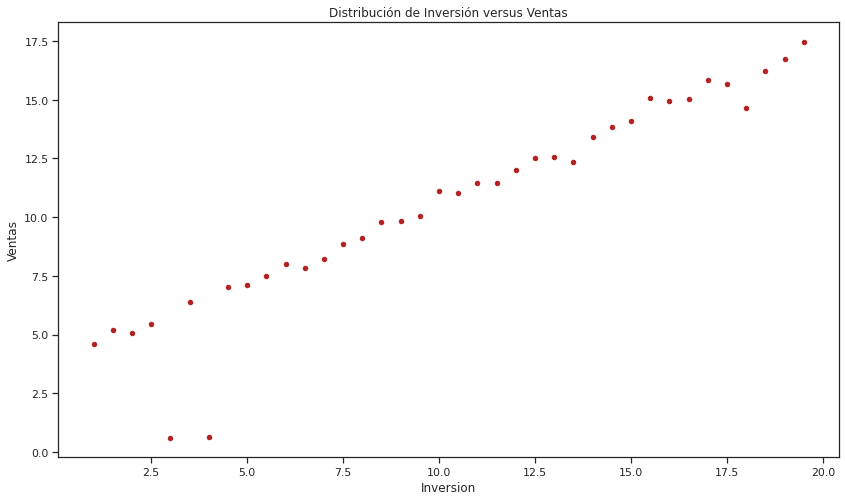

In [57]:
# Gráfico  de dispersión 
# ==============================================================================
fig, ax = plt.subplots(figsize=(14, 8))

df.plot(
    x    = 'Inversion',
    y    = 'Ventas',
    c    = 'firebrick',
    kind = "scatter",
    ax   = ax
)
ax.set_title('Distribución de Inversión versus Ventas');

Se observa cómo hay una línea recta "imaginaria" que pasa por las observaciones en la gráfica de dispersión. Esto hace que parezca que se trata de una recta de regresión lineal. 

Además se ven dos valores que estan fuera de esta linea "imaginaria", que pueden representar valores outlier, los cuales se analizarán a continuación. 

# **Valores Atípicos**

Siempre es conveniente identificar si hay algún posible outlier, ya que podría estar condicionando en gran medida el modelo. La eliminación de este tipo de observaciones debe de analizarse con detalle y dependiendo de la finalidad del modelo. Si el fin es predictivo, un modelo sin outliers ni observaciones altamente influyentes suele ser capaz de predecir mejor la mayoría de casos. Sin embargo, es muy importante prestar atención a estos valores ya que, de no tratarse de errores de medida, pueden ser los casos más interesantes. El modo adecuado de proceder cuando se sospecha de algún posible valor atípico o influyente es calcular el modelo de regresión incluyendo y excluyendo dicho valor.

Analicemos ambas variables para determinar sus valores atípicos:

In [58]:
print("Calculo de primer cuartil, tercer cuartil y rango intercuartílico (IQR) Variable Ventas")
Q1_ventas = df["Ventas"].quantile(0.25)
Q3_ventas = df["Ventas"].quantile(0.75)
IQR_ventas = Q3_ventas - Q1_ventas

print("Primer cuartil:", Q1_ventas)
print("Tercer cuartil:", Q3_ventas)
print("Rango intercuartílico:",IQR_ventas)

print("\n\nCalculo de primer cuartil, tercer cuartil y rango intercuartílico (IQR) Variable Inversion")
Q1_inversion = df["Inversion"].quantile(0.25)
Q3_inversion = df["Inversion"].quantile(0.75)
IQR_inversion = Q3_inversion - Q1_inversion

print("Primer cuartil:", Q1_inversion)
print("Tercer cuartil:", Q3_inversion)
print("Rango intercuartílico:",IQR_inversion)

Calculo de primer cuartil, tercer cuartil y rango intercuartílico (IQR) Variable Ventas
Primer cuartil: 7.565
Tercer cuartil: 14.032499999999999
Rango intercuartílico: 6.4674999999999985


Calculo de primer cuartil, tercer cuartil y rango intercuartílico (IQR) Variable Inversion
Primer cuartil: 5.625
Tercer cuartil: 14.875
Rango intercuartílico: 9.25


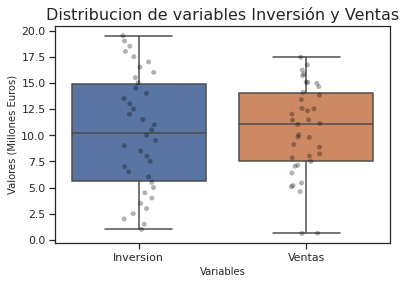

In [59]:
df2 = pd.DataFrame(data=df, columns=["Inversion", "Ventas"])
boxplot = sns.boxplot(x="variable", y="value", data=pd.melt(df2), order=["Inversion", "Ventas"])
boxplot = sns.stripplot(x="variable", y="value", data=pd.melt(df2), marker="o", alpha=0.3, color="black", order=["Inversion", "Ventas"])
boxplot.axes.set_title("Distribucion de variables Inversión y Ventas", fontsize=16)
boxplot.set_xlabel("Variables", fontsize=10)
boxplot.set_ylabel("Valores (Millones Euros)", fontsize=10)
plt.show()


Por outliers entendemos valores superiores a la suma del tercer cuartil más 1.5 veces el IQR, o inferiores al primer cuartil menos 1.5 veces el IQR.




In [60]:
outlier_sup_inversion = Q3_inversion + (IQR_inversion*1.5)
print(df[df["Inversion"] > outlier_sup_inversion])

outlier_min_inversion = Q1_inversion - (IQR_inversion*1.5)
print(df[df["Inversion"] < outlier_min_inversion])

outlier_sup_ventas = Q3_ventas + (IQR_ventas*1.5)
print(df[df["Ventas"] > outlier_sup_ventas])

outlier_min_ventas = Q1_ventas - (IQR_ventas*1.5)
print(df[df["Ventas"] < outlier_min_ventas])

Empty DataFrame
Columns: [Fecha_anual, Inversion, Ventas]
Index: []
Empty DataFrame
Columns: [Fecha_anual, Inversion, Ventas]
Index: []
Empty DataFrame
Columns: [Fecha_anual, Inversion, Ventas]
Index: []
Empty DataFrame
Columns: [Fecha_anual, Inversion, Ventas]
Index: []


Podemos distinguir que no existen valores atipicos dentro de la muestra, lo cual se visualiza en los boxplot de esta sección y se ratifica con el analisis.

# Análisis entre variables Inversión y Ventas

In [62]:
covarianza = df.cov()["Inversion"]["Ventas"]
print("Covarianza de las variables: ", covarianza)

Covarianza de las variables:  22.92993243243243


Con la ***covarianza***, vemos que la relación es positiva, es decir, presenta una relación directa. Esto implica que a medida que aumentan la inversión, hay una tendencia a que se incrementen las ventas.

In [118]:
# Correlación lineal entre Inversión y Ventas
# ==============================================================================
corr_test = pearsonr(x = df['Inversion'], y =  df['Ventas'])
print("Coeficiente de correlación de Pearson: ", round(corr_test[0],4))

Coeficiente de correlación de Pearson:  0.9563


El gráfico y el test de correlación muestran una existe una relación lineal muy fuerte entre las variables (r = 0.956). Tiene sentido intentar generar un modelo de regresión lineal con el objetivo de predecir las ventas en función de la inversión.

# **Ajuste del modelo utilizando Libreria Scipy**

Utilizaremos la función linregress de la Libreria Scipy para ajustar el modelo de regresión lineal.

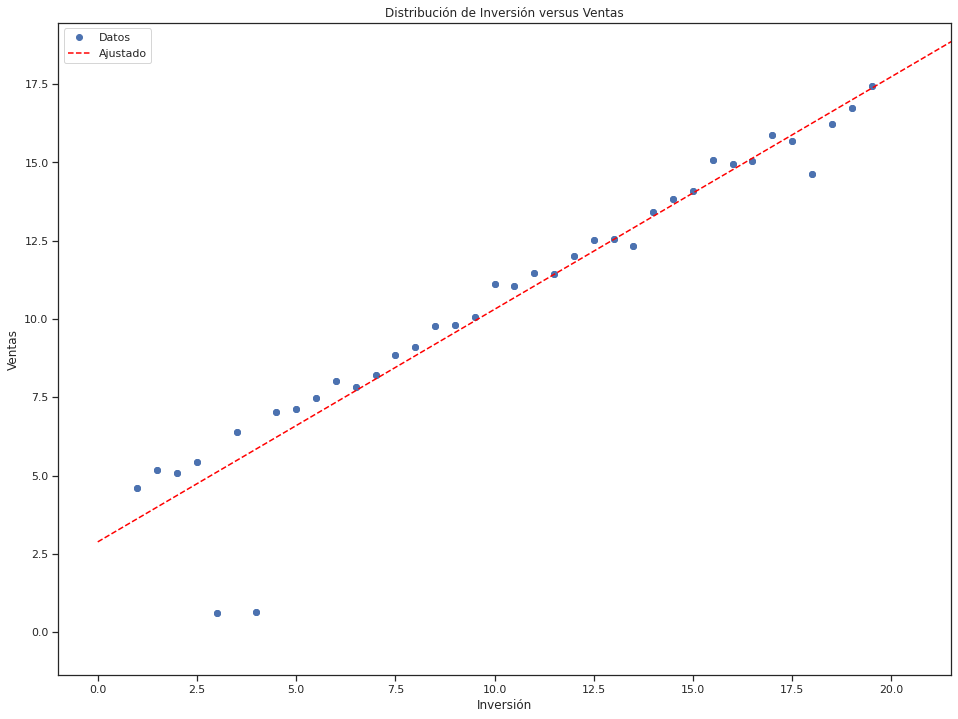

In [89]:
from scipy import stats as ss

#linregress es el metodo para extraer la recta

#pendiente, coeficiente, pearson, p, error
slope, intercept, r, p, se = ss.linregress(df["Inversion"],df["Ventas"])

def Prediccion_ventas(x):
    return intercept + slope*x

recta = np.vectorize(Prediccion_ventas)
linea = Prediccion_ventas(np.arange(3000))

# labels
fig, ax = plt.subplots(figsize=(16,12)) 
plt.title("Distribución de Inversión versus Ventas")
plt.xlabel("Inversión")
plt.ylabel("Ventas")

# limits
plt.xlim(df["Inversion"].min() - 2 , df["Inversion"].max() + 2 )
plt.ylim(df["Ventas"].min() - 2 , df["Ventas"].max() + 2 )

# Nube de puntos + recta de regresión
plt.scatter(df["Inversion"],df["Ventas"])
colores= ['blue', 'red']
ax.plot(df["Inversion"], df["Ventas"], 'o' , label='Datos' )
ax.plot(linea , 'r--', color='red', label="Ajustado")
legend = ax.legend(loc="best") 


In [90]:
print(f"Pendiente: {slope}\nCoeficiente: {intercept}\nCoeficiente Pearson: {r}\nP-Values: {p}\nError: {se}")

Pendiente: 0.7426698763540868
Coeficiente: 2.8805285042127142
Coeficiente Pearson: 0.9562823420491505
P-Values: 8.25497955552195e-21
Error: 0.0378532029452961


Ahora utilizando la función generada Prediccion_ventas(), haremos una predicción de ventas si la inversión es de 7 millones de euros:

In [116]:
print("La prediccion de Ventas para 7 millones de euros en inversión es de: ", round(Prediccion_ventas(7),3) , "millones de euros")

La prediccion de Ventas para 7 millones de euros en inversión es de:  8.079 millones de euros


In [92]:
var1 = df["Ventas"] - df["Inversion"].map(Prediccion_ventas)

In [93]:
print(sum(var1**2))

58.927288456067366


# Ajuste del modelo utilizando Libreria Statsmodels

La implementación de regresión lineal de Statsmodels, además de ajustar el modelo, permite calcular los test estadísticos y análisis necesarios para verificar que se cumplen las condiciones sobre las que se basa este tipo de modelos. 

In [104]:
from patsy import dmatrices
y, X = dmatrices('Ventas ~ Inversion', data=df, return_type='dataframe')

In [105]:
modelo = sm.OLS(y, X)    # Describe el modelo
resultado = modelo.fit()       # Ajusta el modelo
print(resultado.summary())   # Resume el modelo

                            OLS Regression Results                            
Dep. Variable:                 Ventas   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     384.9
Date:                Mon, 21 Feb 2022   Prob (F-statistic):           8.25e-21
Time:                        15:32:24   Log-Likelihood:                -62.255
No. Observations:                  38   AIC:                             128.5
Df Residuals:                      36   BIC:                             131.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.8805      0.440      6.546      0.0

In [106]:
resultado.params

Intercept    2.880529
Inversion    0.742670
dtype: float64

In [109]:
resultado.ssr

58.927288456067394

In [110]:
resultado.f_pvalue


8.25497955552173e-21

El modelo lineal generado sigue la ecuación:

In [111]:
Ventas = resultado.params["Intercept"] + resultado.params["Inversion"]*7

In [112]:
Ventas

8.079217638691324

# **Conclusiones finales**

La columna (coef) devuelve el valor estimado para los dos parámetros de la ecuación del modelo lineal ( 𝛽̂ 0  y  𝛽̂ 1 ) que equivalen a la ordenada en el origen (intercept o const) y a la pendiente. Se muestran también los errores estándar, el valor del estadístico t y el p-value (dos colas) de cada uno de los dos parámetros. Esto permite determinar si los predictores son significativamente distintos de 0, es decir, que tienen importancia en el modelo. Para el modelo generado, tanto la ordenada en el origen como la pendiente son significativas (p-values < 0.05).

El valor de R-squared indica que el modelo es capaz de explicar el 91.4% de la variabilidad observada en la variable respuesta (ventas). Además, el p-value obtenido en el test F (Prob (F-statistic) = 8.254) indica que sí hay evidencias de que la varianza explicada por el modelo es superior a la esperada por azar (varianza total).

El modelo lineal generado sigue la ecuación:

ventas = 2.880529 + 0.742670 * inversion
 
Por cada unidad que se incrementa el número de bateos, el número de runs aumenta en promedio 0.6305 unidades.

El error de test del modelo es de 58.927. Las predicciones del modelo final se alejan en promedio 58.927 unidades del valor real.